# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### Step 1.1: How many marketing campaigns does this data represent?
This data represents 17 marketing campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import pandas as pd

In [8]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



#### Step 3.1: determine if any of the features are missing values
Any feature bearing positive values returned from df.isna().sum() has missing values.

In [14]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Step 3.2: determine if any of the features need to be coerced to a different data type
Any feature bearing NaN values in the mean field return from df.describe(include='all') will need to be coerced to a different data type.

In [17]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Step 4.1: Business Objective
Determine which client attributes and marketing features most influence whether a client subscribes to a term deposit, in order to optimize future marketing campaign strategies for improved effectiveness and targeting.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

#### Step 5.1: Encoding
Performs one-hot encoding to categorical features.

In [26]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
nonnumeric_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df = pd.get_dummies(df, columns=nonnumeric_features, drop_first=True)                       

#### Step 5.2: Scaling
Performs scaling to numerical features.

In [29]:
from sklearn.preprocessing import StandardScaler
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] 
X = df.drop('y', axis=1)
y = df['y']

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_features] = scaler.fit_transform(X_scaled[numeric_features])


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [39]:
y.value_counts(normalize=True)

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

#### Step 7.1: What is the baseline performance that our classifier should aim to beat?
Based on the output, a naive classifier that always predicts class 0 (the majority class) would achieve an accuracy of 88.73%. Thus, 88.73% is the performance my classifier should aim to beat. 

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [44]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

### Problem 9: Score the Model

What is the accuracy of your model?

In [47]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
lgr_prediction = lgr.predict(X_test)
lgr_accuracy_score = accuracy_score(y_test, lgr_prediction)
lgr_recall_score = recall_score(y_test, lgr_prediction)
lgr_precision_score = precision_score(y_test, lgr_prediction)
lgr_f1_score = f1_score(y_test, lgr_prediction)
print(lgr_accuracy_score)

0.9110220927409566


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
classifiers = {'Logistic Regression model':LogisticRegression(), 'KNN algorithm':KNeighborsClassifier(),'Decision Tree':DecisionTreeClassifier(),'SVM models':SVC(class_weight='balanced')}
performances = []
for name, classifier in classifiers.items():
    start_time = time.time()
    classifier.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    accuracy_train = accuracy_score(y_train, classifier.predict(X_train))
    accuracy_test = accuracy_score(y_test, classifier.predict(X_test))
    recall_score_test = recall_score(y_test, classifier.predict(X_test))
    precision_score_test = precision_score(y_test, classifier.predict(X_test))
    f1_score_test = f1_score(y_test, classifier.predict(X_test))
    performances.append({'Model':name, 'Train Time':train_time, 'Train Accuracy':accuracy_train, 'Test Accuracy':accuracy_test,
                        'Test Recall':recall_score_test,'Test Precision':precision_score_test,'Test F1 score':f1_score_test})
performances_df = pd.DataFrame(performances)
print(performances_df)

                       Model  Train Time  Train Accuracy  Test Accuracy  \
0  Logistic Regression model    0.201142        0.911927       0.911022   
1              KNN algorithm    0.002884        0.928619       0.903010   
2              Decision Tree    0.426489        1.000000       0.888808   
3                 SVM models   29.861710        0.856722       0.845472   

   Test Recall  Test Precision  Test F1 score  
0     0.428877        0.668333       0.522476  
1     0.456684        0.594708       0.516636  
2     0.531551        0.509744       0.520419  
3     0.926203        0.418357       0.576373  


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Step 11.1: Reloading dataset and apply more feature engineering and exploration - categorical features

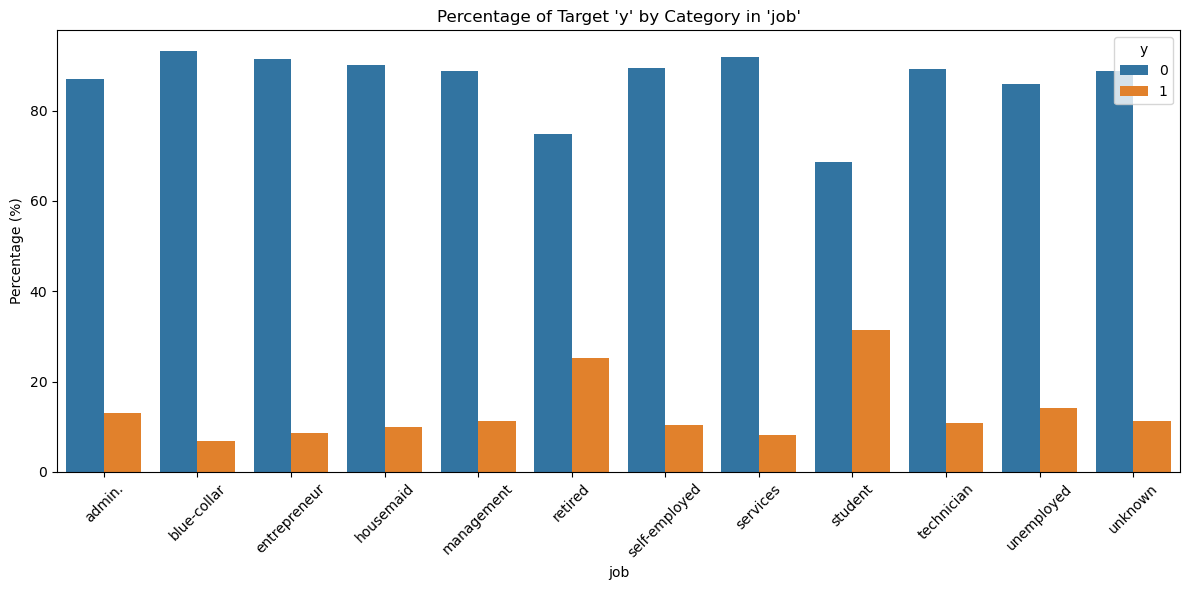

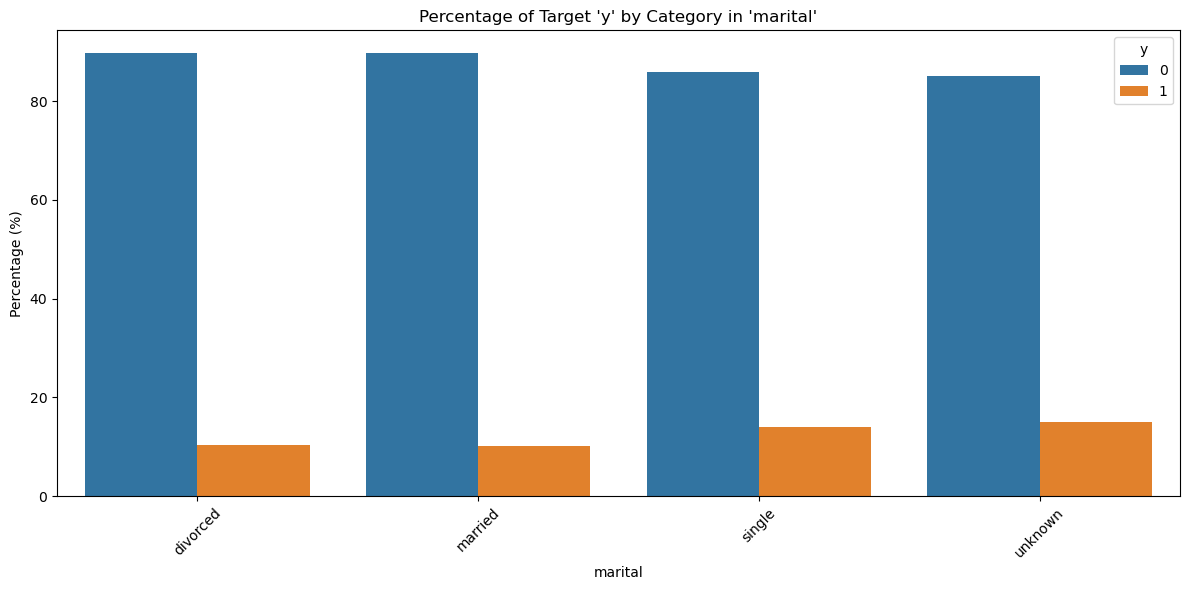

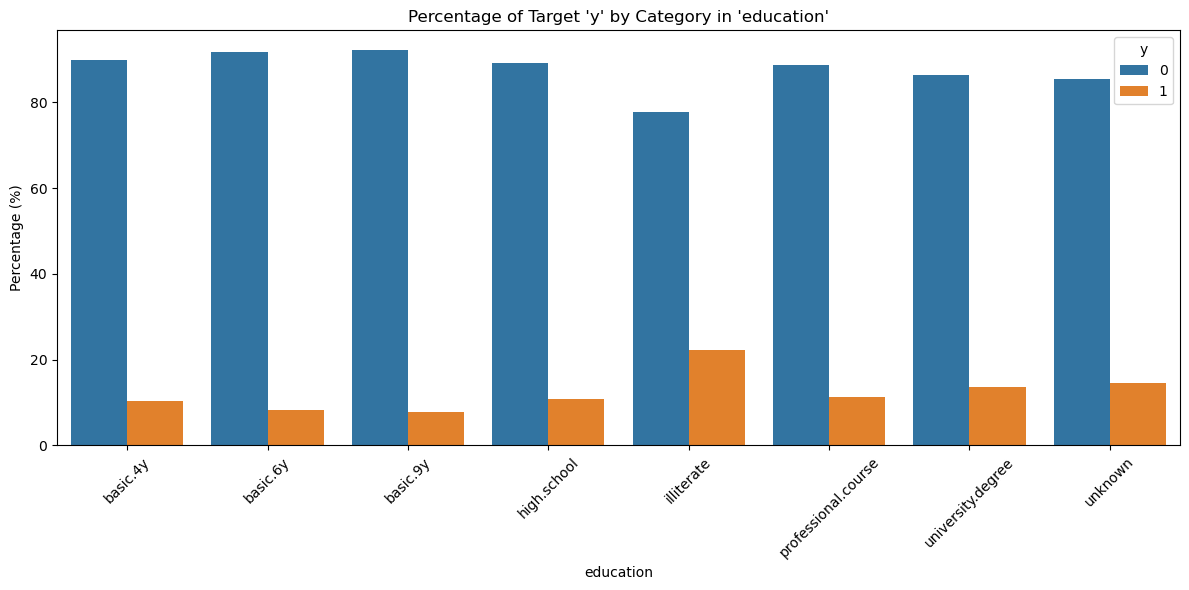

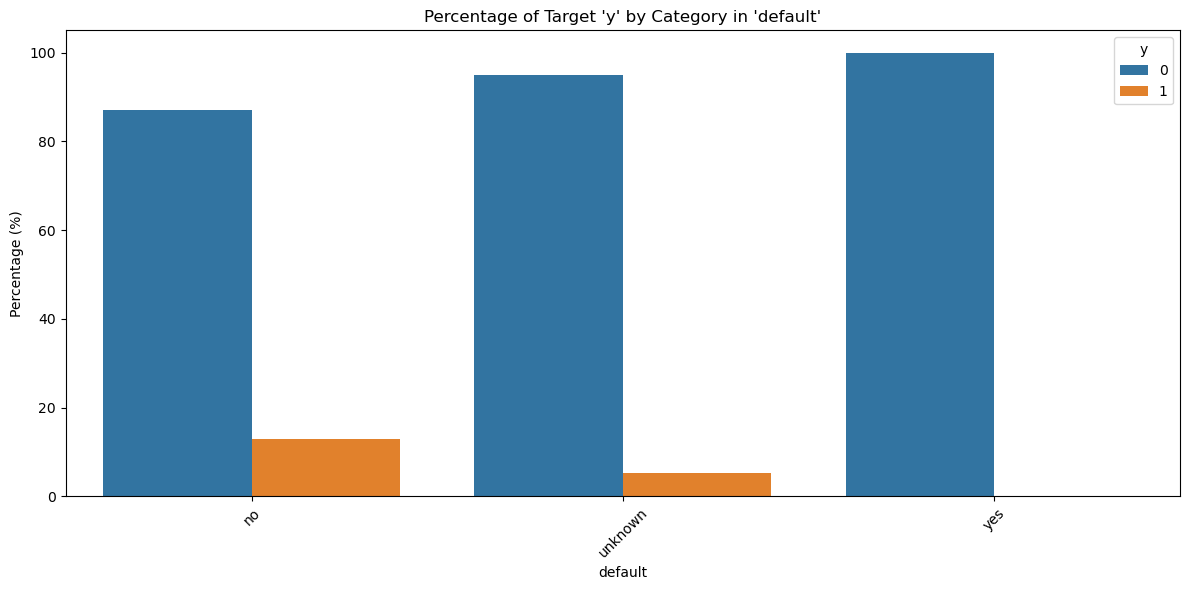

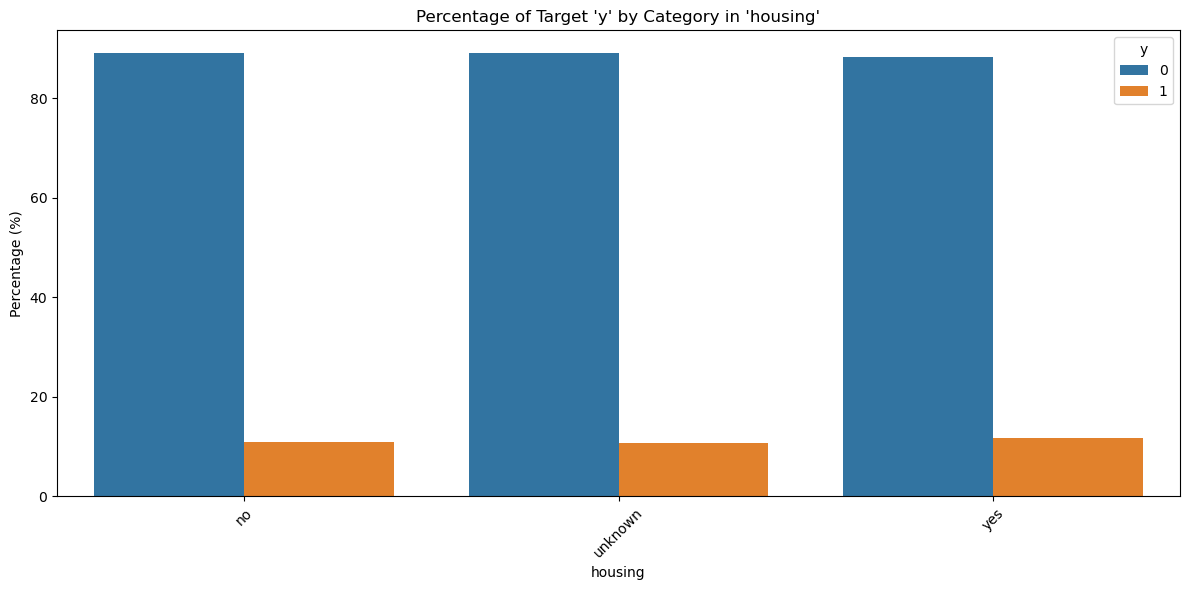

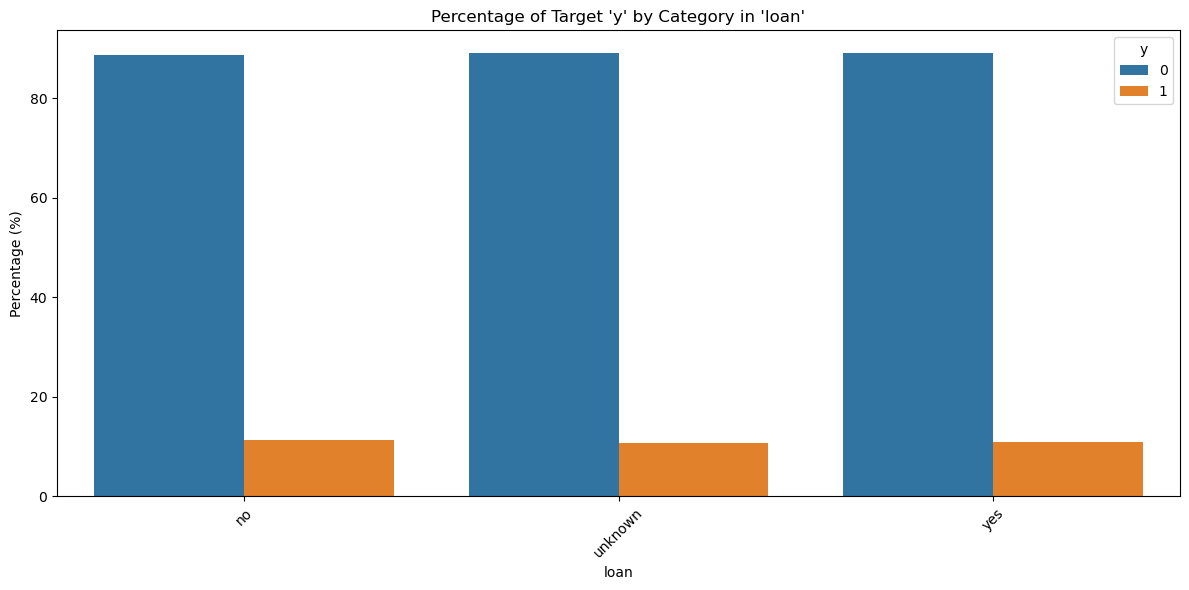

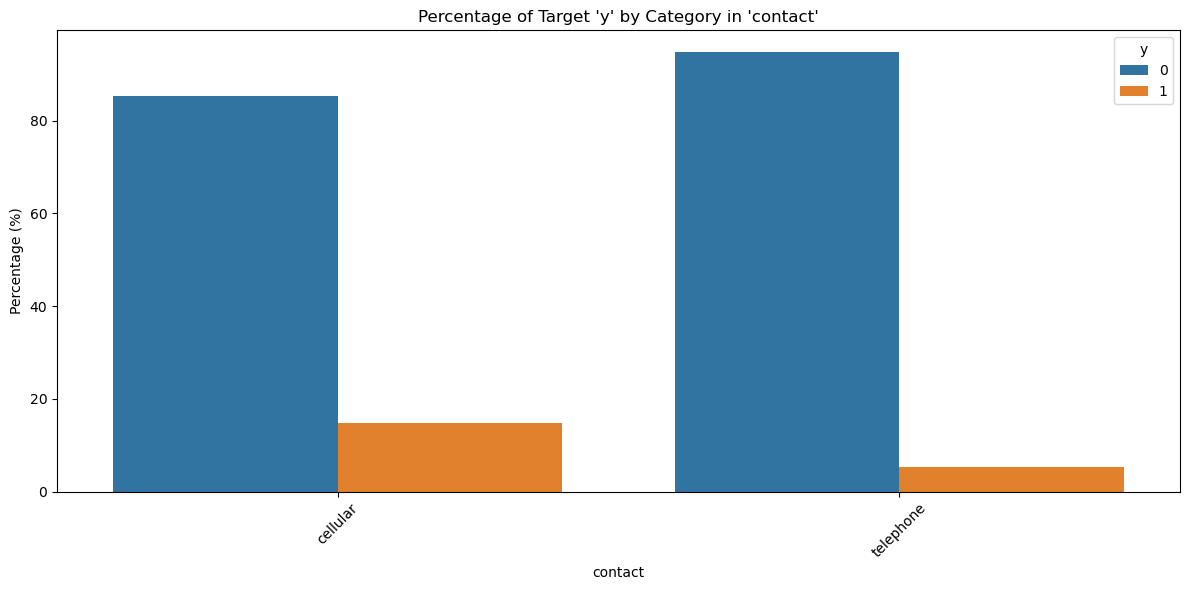

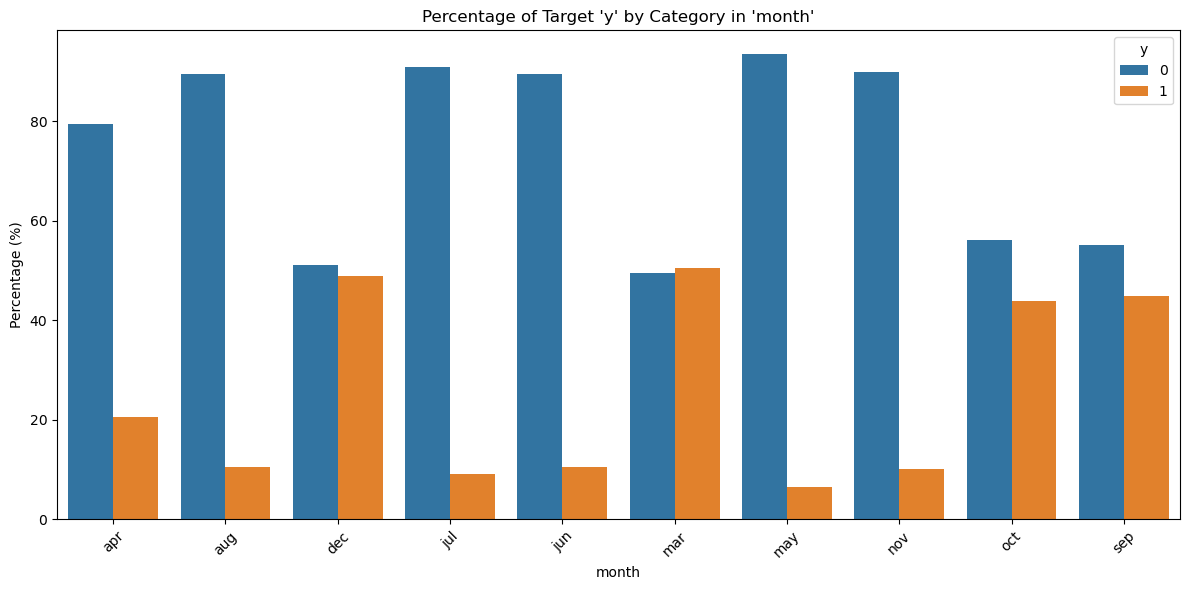

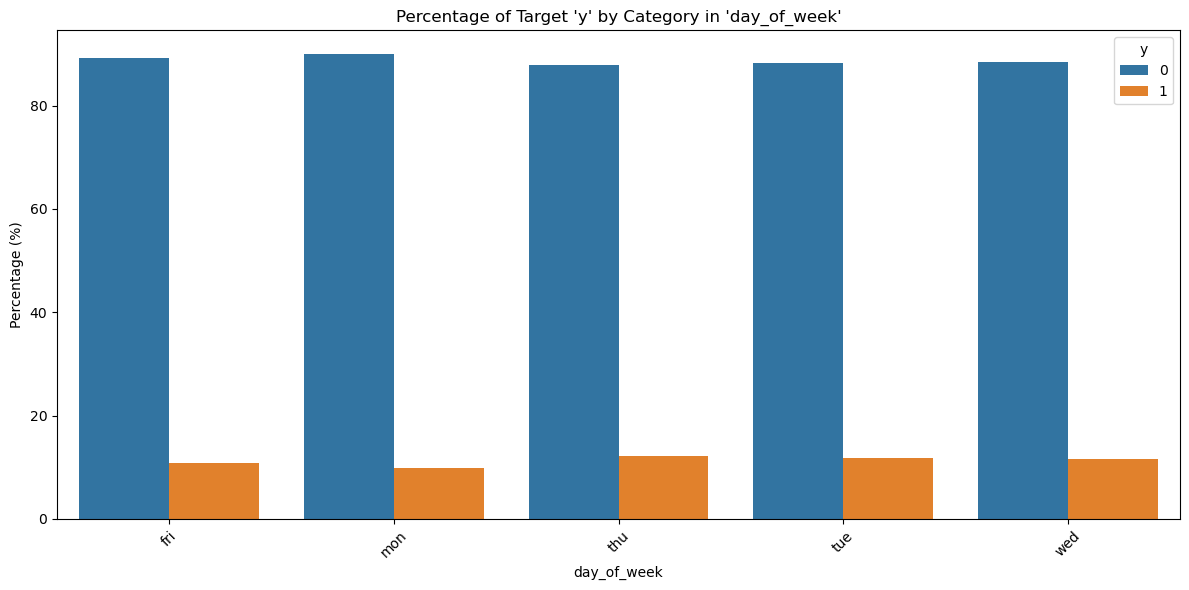

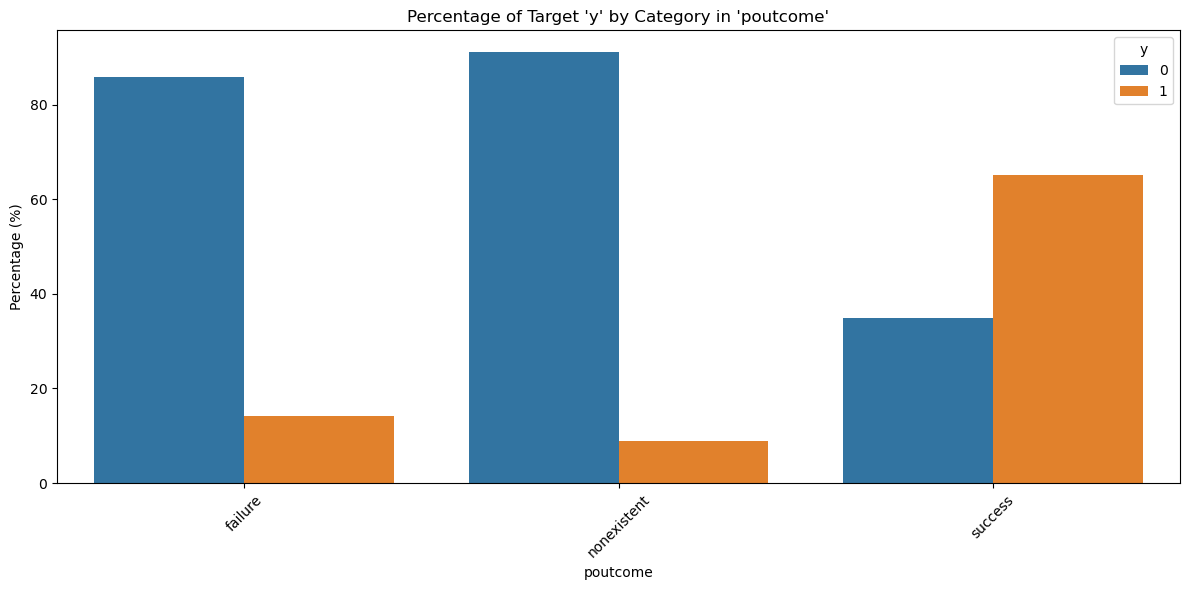

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df['y'] = df['y'].map({'yes': 1, 'no': 0})

for col in nonnumeric_features:
    count_df = df.groupby([col, 'y']).size().reset_index(name='count')
    total_per_category = count_df.groupby(col)['count'].transform('sum')
    count_df['percentage'] = 100 * count_df['count'] / total_per_category
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=count_df, x=col, y='percentage', hue='y')
    plt.title(f"Percentage of Target 'y' by Category in '{col}'")
    plt.xticks(rotation=45)
    plt.ylabel('Percentage (%)')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

Based on the results above, the class distribution of 'y' is similar across the unique values of the housing, loan, and day_of_week features. Therefore, these features are unlikely to contribute meaningful predictive power and can be excluded from the model.

In [59]:
df = df.drop(columns=['housing', 'loan', 'day_of_week'])

#### Step 11.2: More feature engineering and exploration - numerical features

In [62]:
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()['y'].abs().sort_values(ascending=False)
print(correlations)

y                 1.000000
duration          0.405274
nr.employed       0.354678
pdays             0.324914
euribor3m         0.307771
emp.var.rate      0.298334
previous          0.230181
cons.price.idx    0.136211
campaign          0.066357
cons.conf.idx     0.054878
age               0.030399
Name: y, dtype: float64


Based on the results above, the features campaign, cons.conf.idx, and age show low correlation with the target variable y and can be considered for exclusion from the model.

In [66]:
df = df.drop(columns=['campaign', 'cons.conf.idx', 'age'])

In [68]:
df.head()

,job,marital,education,default,contact,month,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,housemaid,married,basic.4y,no,telephone,may,261,999,0,nonexistent,1.1,93.994,4.857,5191.0,0
1,services,married,high.school,unknown,telephone,may,149,999,0,nonexistent,1.1,93.994,4.857,5191.0,0
2,services,married,high.school,no,telephone,may,226,999,0,nonexistent,1.1,93.994,4.857,5191.0,0
3,admin.,married,basic.6y,no,telephone,may,151,999,0,nonexistent,1.1,93.994,4.857,5191.0,0
4,services,married,high.school,no,telephone,may,307,999,0,nonexistent,1.1,93.994,4.857,5191.0,0


#### Step 11.3: Applying encoding and scaling

In [71]:
nonnumeric_features_new = ['job', 'marital', 'education', 'default', 'contact', 'month', 'poutcome']
df = pd.get_dummies(df, columns=nonnumeric_features_new, drop_first=True) 
numeric_features_new = ['duration', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed'] 
X = df.drop('y', axis=1)
y = df['y']

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_features_new] = scaler.fit_transform(X_scaled[numeric_features_new])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Step 11.4: Hyperparameter tuning and grid search
Using GridSearchCV to find best parameters for each model

In [74]:
from sklearn.model_selection import GridSearchCV

In [76]:
lgr = LogisticRegression(max_iter=1000)
params ={'C':[0.01, 0.1, 1, 10, 100]}
lgr_grid = GridSearchCV(estimator=lgr, param_grid=params, cv=5, n_jobs=-1)
lgr_grid.fit(X_train, y_train)
print("Best Logistic Regression:", lgr_grid.best_params_)
print("Best cross-validated score:", lgr_grid.best_score_)

knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1)
knn_grid.fit(X_train, y_train)
print("Best KNN:", knn_grid.best_params_)
print("Best KNN score:", knn_grid.best_score_)

dt = DecisionTreeClassifier()
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(dt, dt_params, cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)
print("Best Decision Tree:", dt_grid.best_params_)
print("Best Decision Tree score:", dt_grid.best_score_)

svc = SVC()

svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

svc_grid = GridSearchCV(svc, svc_params, cv=5, n_jobs=-1)
svc_grid.fit(X_train, y_train)
print("Best SVC:", svc_grid.best_params_)
print("Best SVC score:", svc_grid.best_score_)

Best Logistic Regression: {'C': 10}
Best cross-validated score: 0.9107132018209407
Best KNN: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best KNN score: 0.9063429438543247
Best Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best Decision Tree score: 0.9135963581183612
Best SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVC score: 0.9102579666160849


#### Step 11.5: Adjust your performance metric
Adjust the performance metric for each model based on the GridSearchCV results from step 11.4

In [79]:
performances_new = []
classifier = lgr_grid.best_estimator_
start_time = time.time()
classifier.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time
accuracy_train = accuracy_score(y_train, classifier.predict(X_train))
prediction_test = classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, prediction_test)
recall_score_test = recall_score(y_test, prediction_test)
precision_score_test = precision_score(y_test, prediction_test)
f1_score_test = f1_score(y_test, prediction_test)
performances_new.append({'Model':'Logistic Regression model', 'Train Time':train_time, 'Train Accuracy':accuracy_train, 'Test Accuracy':accuracy_test,
                        'Test Recall':recall_score_test,'Test Precision':precision_score_test,'Test F1 score':f1_score_test})

classifier = knn_grid.best_estimator_
start_time = time.time()
classifier.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time
accuracy_train = accuracy_score(y_train, classifier.predict(X_train))
prediction_test = classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, prediction_test)
recall_score_test = recall_score(y_test, prediction_test)
precision_score_test = precision_score(y_test, prediction_test)
f1_score_test = f1_score(y_test, prediction_test)
performances_new.append({'Model':'KNN algorithm', 'Train Time':train_time, 'Train Accuracy':accuracy_train, 'Test Accuracy':accuracy_test,
                        'Test Recall':recall_score_test,'Test Precision':precision_score_test,'Test F1 score':f1_score_test})

classifier = dt_grid.best_estimator_
start_time = time.time()
classifier.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time
accuracy_train = accuracy_score(y_train, classifier.predict(X_train))
prediction_test = classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, prediction_test)
recall_score_test = recall_score(y_test, prediction_test)
precision_score_test = precision_score(y_test, prediction_test)
f1_score_test = f1_score(y_test, prediction_test)
performances_new.append({'Model':'Decision Tree', 'Train Time':train_time, 'Train Accuracy':accuracy_train, 'Test Accuracy':accuracy_test,
                        'Test Recall':recall_score_test,'Test Precision':precision_score_test,'Test F1 score':f1_score_test})

classifier = svc_grid.best_estimator_
start_time = time.time()
classifier.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time
accuracy_train = accuracy_score(y_train, classifier.predict(X_train))
prediction_test = classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, prediction_test)
recall_score_test = recall_score(y_test, prediction_test)
precision_score_test = precision_score(y_test, prediction_test)
f1_score_test = f1_score(y_test, prediction_test)
performances_new.append({'Model':'SVM models', 'Train Time':train_time, 'Train Accuracy':accuracy_train, 'Test Accuracy':accuracy_test,
                        'Test Recall':recall_score_test,'Test Precision':precision_score_test,'Test F1 score':f1_score_test})

performances_new_df = pd.DataFrame(performances_new)
print(performances_new_df)

                       Model  Train Time  Train Accuracy  Test Accuracy  \
0  Logistic Regression model    0.177844        0.911168       0.912115   
1              KNN algorithm    0.005552        0.921335       0.908352   
2              Decision Tree    0.080536        0.917329       0.915149   
3                 SVM models   16.340876        0.917451       0.909444   

   Test Recall  Test Precision  Test F1 score  
0     0.437433        0.673806       0.530480  
1     0.471658        0.628205       0.538790  
2     0.543316        0.651282       0.592420  
3     0.404278        0.666667       0.503329  


#### Step 11.6: Print the coefficients of Logistic Regression

In [81]:
coefs = lgr_grid.best_estimator_.coef_[0]
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefs})
sorted_df = coef_df.sort_values(by='Coefficient', ascending=False)

print(sorted_df)

                          Feature  Coefficient
35                      month_mar     1.908114
0                        duration     1.208996
5                       euribor3m     1.146090
4                  cons.price.idx     1.042454
41               poutcome_success     0.860618
31                      month_aug     0.857969
40           poutcome_nonexistent     0.411524
11                    job_retired     0.238156
39                      month_sep     0.233414
24           education_illiterate     0.232788
14                    job_student     0.165145
38                      month_oct     0.151400
26    education_university.degree     0.142633
33                      month_jul     0.131970
21             education_basic.6y     0.097044
16                 job_unemployed     0.073793
15                 job_technician     0.062629
32                      month_dec     0.046754
19                 marital_single     0.025181
27              education_unknown     0.006440
29           

## Findings
- This is an imbalanced dataset
- KNN is the fastest, followed by Logistic regression. SVC is the slowest.
- After tuning, each model has accuracy over 0.9, which is higher than 
- Overall, the Decision Tree model offers the best performance in terms of test accuracy, while Logistic Regression strikes a good balance between speed and performance. KNN is suitable for extremely fast training needs, though it slightly underperforms on test accuracy. SVM may be less practical due to its high computational cost without a significant accuracy advantage.
- Top ten features with highest positive coefficients are: month_mar, duration, euribor3m, cons.price.idx, poutcome_success, month_aug, poutcome_nonexistent, job_retired, month_sep, education_illiterate  

##### Questions